# Task 1 (9 points)

All questions are related to the Titanic data set (titanic.csv).

Find the dataset description here: https://www.kaggle.com/c/titanic/data

Be free with the assumptions about the data but please state that assumptions in your solution.

This homework has not automatic tests.

After you are done, save this file and submit:
- this file
- titanic.csv

1. Load the csv into the DataFrame and fill in all the missing column information with the mean of each column.
Base all the further answers on this DataFrame.


In [2]:
import pandas as pd
frame = pd.read_csv("titanic.csv")
age_mean = frame.mean()['Age']
df= frame.fillna(value={"Age":age_mean, "Cabin":"X", "Embarked":"S"})
display(df)

#Embark missing values are filled with the mode of Embark column
#Missing cabin information is filled with X because nothing else makes sense

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,X,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,X,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,X,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,X,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,X,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


2. How many relatives on the board each passenger on average has? Calculated and return Name and Number relatives columns.

In [3]:
relatives = df[["SibSp","Parch"]]
df["Relatives"] = relatives.sum(axis=1, numeric_only=True)
df

#or df[["Name","Relatives"]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,X,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,X,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,X,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,X,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,X,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0


3. Who are richer: married or unmarried women?

In [4]:
#Wealth status is stated by the ticket class. It is assumed that there is in general a correlation between the class and the fare price. The higher the price, the richer a person is assumed to be.

mrs = df[df["Name"].str.contains("Mrs.")]
mrs_mean_fare = mrs.mean()["Fare"]

miss = df[df["Name"].str.contains("Miss")]
miss_mean_fare = miss.mean()["Fare"]

print(mrs_mean_fare > miss_mean_fare)
print("On average, married women are richer as they tended to have higher class tickets which were in general also more expensive")




True
On average, married women are richer as they tended to have higher class tickets which were in general also more expensive


4. How many people would survive under the assumption that it is possible to survive if and only if one embarked as one of the latest?

In [5]:
#Based on found information, the last embark port was Queenstown(Cobh)

queenstown_port = df[df["Embarked"].str.contains("Q")]
survivors = queenstown_port.count()["Embarked"]
print(f"There would be {survivors} survivors")


There would be 77 survivors


5. Who is more unlucky: men or women? Illustrate with the pie charts.

There were in total 891 passengers
Out of all passengers there were 342 survivors out of which 109 were male and 233 were female
Out of all passengers 549 died out of which 468 were male and 81 were female
Only 18.890814558058924 % of all males survived while 74.20382165605095 % of all women survived


Text(0.5, 1.0, 'Ladies first')

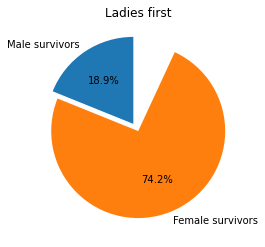

In [6]:
import matplotlib.pyplot as plt
#female = queenstown_port[queenstown_port["Sex"].str.contains("female")]
#female_survivors = female.count()["Sex"]
#male_survivors = survivors - female_survivors

#plt.pie([male_survivors, female_survivors], labels=["Male survivors","Female survivors"], autopct="%1.1f%%", startangle=90, explode=[0.1,0])
#plt.title("What gender has a higher number of survivors")

survivors = df.query("Survived >0")
total_survivors = survivors.count()["Survived"]

male_survivors = survivors[survivors["Sex"].str.startswith("male")]
total_male_survivors = male_survivors.count()["Sex"]

female_survivors = survivors[survivors["Sex"].str.startswith("female")]
total_female_survivors = female_survivors.count()["Sex"]

died = df.query("Survived <1")
total_died = died.count()["Survived"]

male_died = died[died["Sex"].str.startswith("male")]
total_male_died = male_died.count()["Sex"]

female_died = died[died["Sex"].str.startswith("female")]
total_female_died = female_died.count()["Sex"]

total_men = 109+468
total_women = 233+81

print(f"There were in total", 891, "passengers")
print(f"Out of all passengers there were {total_survivors} survivors out of which {total_male_survivors} were male and {total_female_survivors} were female")
print(f"Out of all passengers {total_died} died out of which {total_male_died} were male and {total_female_died} were female")
print("Only",109/total_men*100, "% of all males survived while",233/total_women*100,"% of all women survived")

prct_men = 109/total_men
prct_women = 233/total_women

plt.pie([prct_men, prct_women], labels = ["Male survivors","Female survivors"], autopct="%1.1f%%", startangle=90, explode=[0.1,0], normalize = False)
plt.title("Ladies first")

#The piechart doesn't add up to 100% because I chose different base for females and males. For females it is survived females against total females onboard; for males it is survived males against total males onboard
#It might not look good on a piechart but I thought it might give a better insight into the percentage of survived female passangers

6. Make a histogram of passengers' age and add it to the figure with the histogram.

<ipython-input-44-ca8db62d35df>:23: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  subplot3.pie([array_prct_male, array_prct_female], startangle = 90, autopct = "%1.f%%", explode=[0.1,0])


([<matplotlib.patches.Wedge at 0x1b8d05cd910>,
 [Text(-0.6710916654223622, 0.9948044916467962, ''),
  Text(0.40446939879720784, -1.0229391504076015, '')],
 [Text(-0.39147013816304455, 0.5803026201272976, '19%'),
  Text(0.22061967207120425, -0.557966809313237, '74%')])

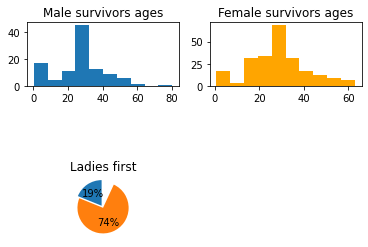

In [44]:
import numpy as np
#male_histogram = plt.hist(male_survivors["Age"])
#female_histogram = plt.hist(female_survivors["Age"])

#figure, axes = plt.subplots(nrows=2, ncols=2)
array_male = np.array(male_survivors["Age"])
array_female = np.array(female_survivors["Age"])
array_prct_male = np.array(prct_men)
array_prct_female = np.array(prct_women)

fig = plt.figure()

subplot1 = fig.add_subplot(3,2,1)
subplot1.hist(array_male)
subplot1.set_title("Male survivors ages")

subplot2 = fig.add_subplot(3,2,2)
subplot2.hist(array_female, color = "orange")
subplot2.set_title("Female survivors ages")

subplot3 = fig.add_subplot(3,2,5)
subplot3.set_title("Ladies first")
subplot3.pie([array_prct_male, array_prct_female], startangle = 90, autopct = "%1.f%%", explode=[0.1,0])